In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.43


In [3]:
def build(robot):
    R=.5
    r=R/5
    
    x=1
    y=2
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name='center')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    robot.disks=disks
    robot.angles=list(range(0,360,30))
    robot.distances=[-1]*len(disks)
    
    
    robot.boxes=[]
    for i in range(11):
        box=Box(robot,x=5+i*1.6,y=1,width=.2,height=1,angle=90,name="Box %d" % i)
        robot.boxes.append(box)


In [4]:
def forward(t,robot):
    for disk in robot.disks:
        disk.F=0
        
    robot['disk 0'].F=10
    return True

def wait2(t,robot):
    if t>2:
        return True

def wait3(t,robot):
    if t>3:
        return True

def up(t,robot):
    for disk in robot.disks:
        disk.F=0
        
    robot['disk 90'].F=10
    return True

In [5]:
def monitor(t,robot):
    robot.message=t

In [ ]:
def turn_green(t,robot):
    robot.color='g'
    return True

def turn_red(t,robot):
    robot.color='r'
    return True

def turn_purple(t,robot):
    robot.color='purple'
    return True

In [6]:
def read_distances(t,robot):
    robot.distances=[disk.read_distance() for disk in robot.disks]
    robot.box_distances=[box.read_distance() for box in robot.boxes]
    return True



def set_move(t,robot):
    from Game import Board 
    
    count=0
    for distance in robot.box_distances:
        if distance<20:
            count+=1
            
            
    state=Board(1,count)
    print(state)
            
    robot.count=count
    robot.move=(count-1)%4
    if robot.move==0:
        robot.move=1
        
    return True

def until_piece_up(t,robot):
    distance=robot['disk 90'].read_distance()
    
    if distance<10:
        return True    

def until_piece_up_or_wall(t,robot):
    distance=robot['disk 90'].read_distance()
    
    if distance<10:
        return True    
    
    distance=robot['disk 0'].read_distance()
    
    if distance<2:
        return '_end_simulation'    
    
    
def until_not_piece_up(t,robot):
    distance=robot['disk 90'].read_distance()
    
    if distance>10:
        return True    
        
def move_pt5(t,robot):
    
    try:
        traveled=robot['center'].x-robot.move_pt5_x
    except AttributeError:  
        robot.move_pt5_x=robot['center'].x
        traveled=0.0
        
    if traveled>0.5:
        del robot.move_pt5_x
        return True
    
    
def launch(t,robot):
    
    disk=Box(robot,x=robot['center'].x,y=robot['center'].y+1,angle=90,width=0.5,height=0.5)
    disk.F=10
    
    return True

def forward_to_move(t,robot):
    for disk in robot.disks:
        disk.F=0
        
    robot['disk 0'].F=10

    target_box=robot.count-robot.move
    target_x=robot.boxes[target_box].x-.4
    
    if robot['center'].x>=target_x:
        return True
    
    


    
def until_turn_over(t,robot):
    robot.move-=1
    robot.color=f"#{randint(0x1000000):06x}"

    if robot.move==0:
        return "_end_simulation"
    else:
        return "right"

Version:  0.2.35


In [7]:
state_machine=StateMachine(
    ([read_distances,set_move],"forward_to_move"),
    ([forward_to_move,turn_purple],"forward"),
    ([forward,until_piece_up,move_pt5],'launch'),
     ([launch,until_not_piece_up,until_piece_up_or_wall,move_pt5],'launch'),
)




In [ ]:
def get_human_input(t,robot):
    move=input("give me a move")
    robot.move=move
    return True

Set move code:
```python
def set_move(t,robot):
    count=0
    for distance in robot.box_distances:
        if distance<20:
            count+=1
            
    robot.count=count
    robot.move=(count-1)%4
    if robot.move==0:
        robot.move=1
        
    return True
```

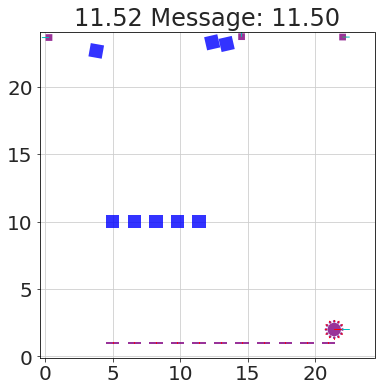

In [13]:
env=FrictionEnvironment(24,24)
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

robot.count=0
robot.seeing_piece=False

N=randint(1,11)
N=8
for i in range(N):
    Box(env,x=5+i*1.6,y=10,density=0.001)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=0.1,  # make this larger for a faster display
       )
